<a href="https://colab.research.google.com/github/dr-mushtaq/Research-Work/blob/main/RTA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>

*   Importing and installing libraries⭐️
*   Installing Pycaret and other libraries⭐️
*   Import libraries⭐️
*   Particle Swarm Optimization⭐️

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Importing and Installing Librarie**</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Installing Pycaret and other libraries**</p>

In [ ]:
# install the full version
!python -m pip install --upgrade pip setuptools wheel
!pip install pycaret

!pip install pyyaml==5.4.1

!pip install markupsafe==2.0.1

!pip install Jinja2

!pip install mlflow

!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... done
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-linux_x86_64.whl size=27995 sha256=0844708c6c5012e0d6e3f556d1444ce976826759609a89e78a84faa4d0c191b2
  Stored in directory: /root/.cache/pip/wheels/ea/18/79/6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built markupsafe
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Unin

Restart Runtime


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Import Libraries**</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import jinja2
#from pycaret.regression import*
from pycaret.classification import*

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Importing Dataset**</p>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Virtual University /Thesis /Shujaat/Research Paper/KSILatest.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.head()

,YEAR,Month,Date,TIME,Nature of weekday,Day,ROAD_CLASS,DISTRICT,LOCCOORD,ACCLOC,...,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,2006,3,11,852,Weekend,Saturday,Major Arterial,Toronto and East York,Intersection,At Intersection,...,No,No,No,No,No,No,Yes,No,No,No
1,2006,3,11,852,Weekend,Saturday,Major Arterial,Toronto and East York,Intersection,At Intersection,...,No,No,No,No,No,No,Yes,No,No,No
2,2006,3,11,915,Weekend,Saturday,Major Arterial,Scarborough,Intersection,At Intersection,...,Yes,No,No,No,No,No,Yes,Yes,No,No
3,2006,1,1,236,Weekend,Sunday,Major Arterial,Toronto and East York,Intersection,Intersection Related,...,No,No,No,No,Yes,Yes,Yes,No,Yes,No
4,2006,3,11,915,Weekend,Saturday,Major Arterial,Scarborough,Intersection,At Intersection,...,Yes,No,No,No,No,No,Yes,Yes,No,No


In [ ]:
data.info()

In [ ]:
data2 = data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data2.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data2.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15749, 43)
Unseen Data For Predictions: (829, 43)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Data Exploration**</p>

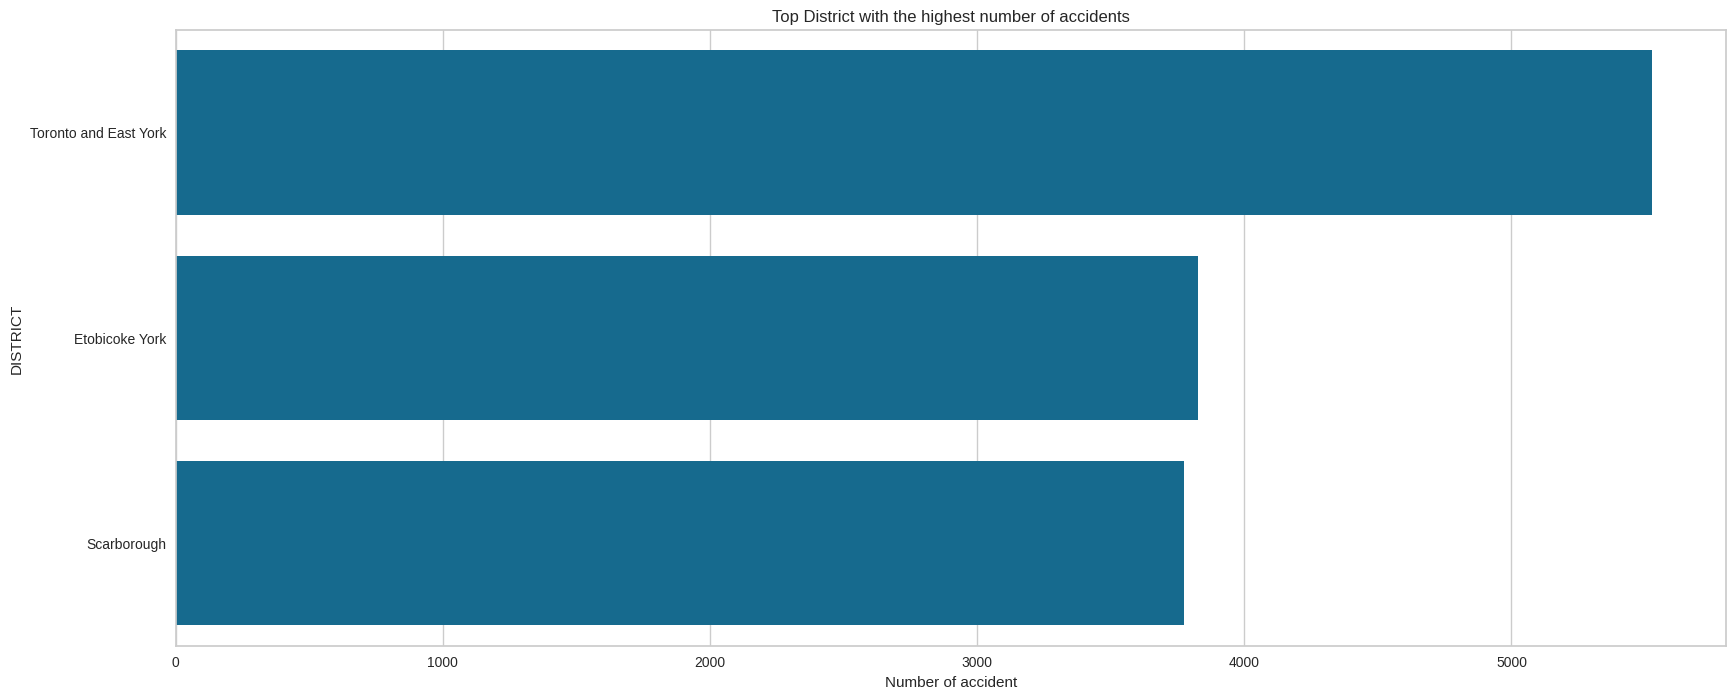

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Top District with the highest number of accidents")
state_counts = data["DISTRICT"].value_counts()
# Pass x and y as named arguments
sns.barplot(x=state_counts[:3].values, y=state_counts[:3].index, orient="h")
plt.xlabel("Number of accident")
plt.ylabel("DISTRICT")
plt.show()

**Number of accidents for weekday**

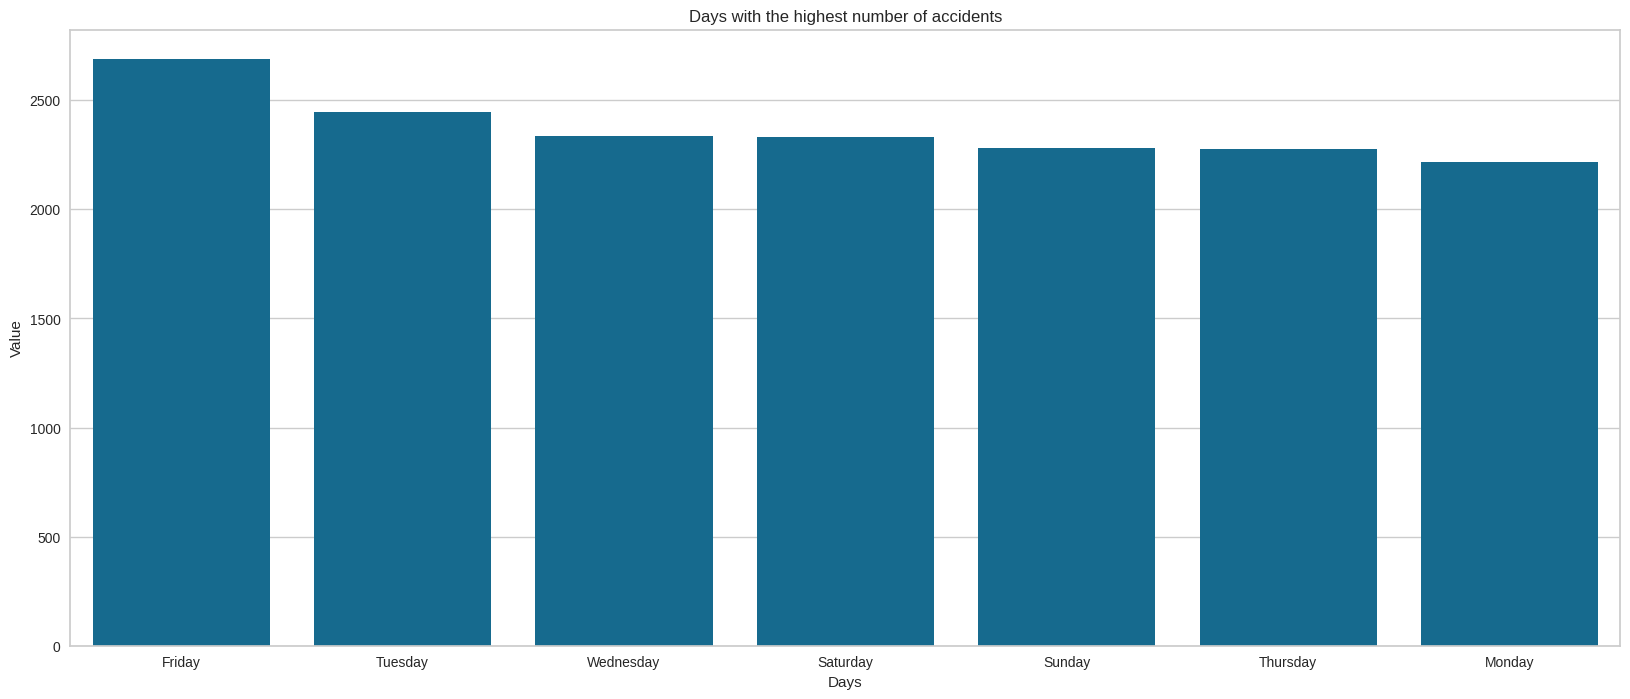

In [ ]:
counts = data["Day"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Number of accidents for weekday")
# Pass x and y as named arguments
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Days")
plt.ylabel("Value")
plt.show()

**Correlation**

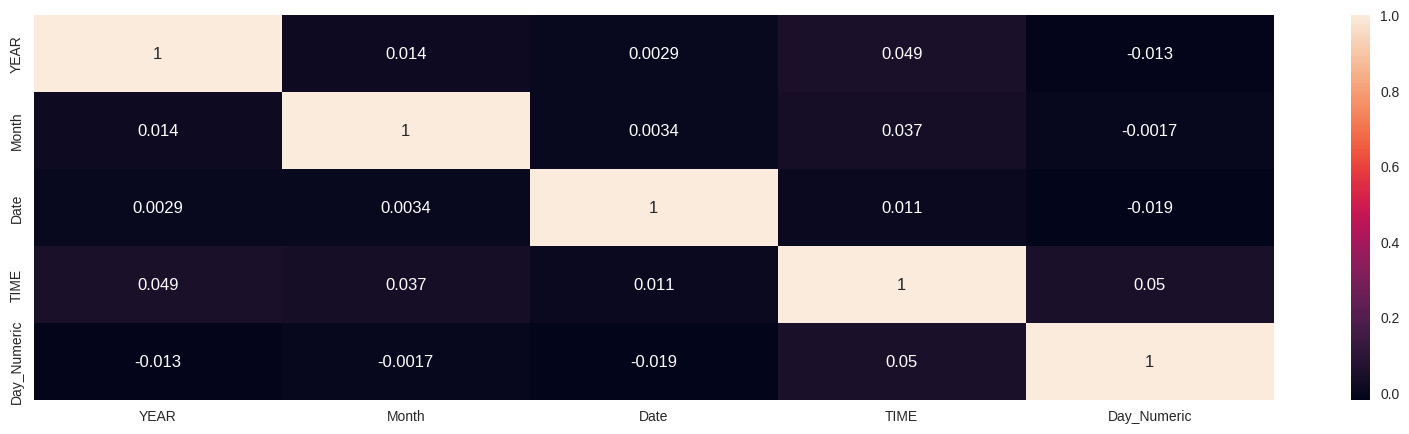

In [ ]:
# Convert 'Day' column to numerical representation before calculating correlation
data['Day_Numeric'] = pd.factorize(data['Day'])[0]

# Now calculate correlation and plot the heatmap using the new numerical column
plt.figure(figsize=(20, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True)  # Specify numeric_only=True for pandas >= 2.0
plt.show()


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Setting up Environment in PyCaret**</p>

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data, target = 'injury_type', fix_imbalance = True, session_id=123)

,Description,Value
0,Session id,123
1,Target,injury_type
2,Target type,Multiclass
3,Target mapping,"Fatal: 0, Major: 1, Minimal: 2, Minor: 3, No injury: 4"
4,Original data shape,"(16578, 43)"
5,Transformed data shape,"(29309, 270)"
6,Transformed train set shape,"(24335, 270)"
7,Transformed test set shape,"(4974, 270)"
8,Numeric features,4
9,Categorical features,38


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Classification**</p>

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Compairing All Models**</p>

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7578,0.9244,0.7578,0.7332,0.7419,0.6301,0.6319,57.0780
xgboost,Extreme Gradient Boosting,0.7554,0.9229,0.7554,0.7316,0.7400,0.6263,0.6281,22.4640
rf,Random Forest Classifier,0.7492,0.9116,0.7492,0.7211,0.7282,0.6132,0.6171,9.2920
et,Extra Trees Classifier,0.7468,0.9015,0.7468,0.7231,0.7313,0.6136,0.6155,10.6410
gbc,Gradient Boosting Classifier,0.7397,0.0000,0.7397,0.7396,0.7388,0.6135,0.6139,97.7730
dt,Decision Tree Classifier,0.6855,0.7819,0.6855,0.6945,0.6895,0.5345,0.5348,3.2570
ridge,Ridge Classifier,0.6817,0.0000,0.6817,0.7797,0.7166,0.5591,0.5689,2.2760
lda,Linear Discriminant Analysis,0.6675,0.0000,0.6675,0.7986,0.7122,0.5470,0.5620,2.9550
lr,Logistic Regression,0.6020,0.0000,0.6020,0.7180,0.6407,0.4578,0.4697,28.9750
nb,Naive Bayes,0.4993,0.8325,0.4993,0.7374,0.5669,0.3491,0.3805,2.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Selecting Best Model**</p>

In [ ]:
best= compare_models(n_select = 9, sort= 'Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:36:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7492,0.9116,0.7492,0.7211,0.7282,0.6132,0.6171,8.8060
dt,Decision Tree Classifier,0.6855,0.7819,0.6855,0.6945,0.6895,0.5345,0.5348,3.1010
ridge,Ridge Classifier,0.6817,0.0000,0.6817,0.7797,0.7166,0.5591,0.5689,2.1990
lr,Logistic Regression,0.6020,0.0000,0.6020,0.7180,0.6407,0.4578,0.4697,28.5470
nb,Naive Bayes,0.4993,0.8325,0.4993,0.7374,0.5669,0.3491,0.3805,2.1260
ada,Ada Boost Classifier,0.4705,0.0000,0.4705,0.6026,0.5147,0.2908,0.3058,6.1970
knn,K Neighbors Classifier,0.2312,0.5103,0.2312,0.3356,0.2458,0.0356,0.0389,2.9720
svm,SVM - Linear Kernel,0.1872,0.0000,0.1872,0.3037,0.1442,0.0623,0.0834,22.9810
qda,Quadratic Discriminant Analysis,0.1861,0.0000,0.1861,0.7359,0.1934,0.0773,0.1441,2.7320


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7578,0.9244,0.7578,0.7332,0.7419,0.6301,0.6319,60.4480
xgboost,Extreme Gradient Boosting,0.7554,0.9229,0.7554,0.7316,0.7400,0.6263,0.6281,22.0710
rf,Random Forest Classifier,0.7492,0.9116,0.7492,0.7211,0.7282,0.6132,0.6171,8.8060
et,Extra Trees Classifier,0.7468,0.9015,0.7468,0.7231,0.7313,0.6136,0.6155,10.9780
gbc,Gradient Boosting Classifier,0.7397,0.0000,0.7397,0.7396,0.7388,0.6135,0.6139,96.7110
dt,Decision Tree Classifier,0.6855,0.7819,0.6855,0.6945,0.6895,0.5345,0.5348,3.1010
ridge,Ridge Classifier,0.6817,0.0000,0.6817,0.7797,0.7166,0.5591,0.5689,2.1990
lda,Linear Discriminant Analysis,0.6675,0.0000,0.6675,0.7986,0.7122,0.5470,0.5620,2.8970
lr,Logistic Regression,0.6020,0.0000,0.6020,0.7180,0.6407,0.4578,0.4697,28.5470
nb,Naive Bayes,0.4993,0.8325,0.4993,0.7374,0.5669,0.3491,0.3805,2.1260



##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Creating Best Models**</p>

In [ ]:
gbc = create_model('gbc')
rf = create_model('rf')
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7485,0.0000,0.7485,0.7457,0.7466,0.6262,0.6264
1,0.7459,0.0000,0.7459,0.7415,0.7429,0.6228,0.6230
2,0.7313,0.0000,0.7313,0.7387,0.7345,0.6030,0.6033
3,0.7425,0.0000,0.7425,0.7388,0.7397,0.6162,0.6167
4,0.7233,0.0000,0.7233,0.7248,0.7227,0.5900,0.5907
5,0.7276,0.0000,0.7276,0.7311,0.7278,0.5957,0.5966
6,0.7422,0.0000,0.7422,0.7433,0.7424,0.6159,0.6161
7,0.7509,0.0000,0.7509,0.7505,0.7503,0.6301,0.6303
8,0.7336,0.0000,0.7336,0.7275,0.7291,0.6029,0.6035


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7571,0.9199,0.7571,0.7311,0.7370,0.6269,0.6306
1,0.7666,0.9196,0.7666,0.7348,0.7430,0.6396,0.6445
2,0.7476,0.9022,0.7476,0.7177,0.7267,0.6099,0.6135
3,0.7442,0.9065,0.7442,0.7163,0.7236,0.6061,0.6096
4,0.7328,0.9067,0.7328,0.7087,0.7176,0.5922,0.5941
5,0.7431,0.9029,0.7431,0.7151,0.7221,0.6023,0.6068
6,0.7500,0.9083,0.7500,0.7254,0.7293,0.6141,0.6175
7,0.7534,0.9204,0.7534,0.7219,0.7319,0.6182,0.6222
8,0.7466,0.9151,0.7466,0.7227,0.7251,0.6083,0.6131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7606,0.9121,0.7606,0.7380,0.7450,0.6351,0.6372
1,0.7545,0.9076,0.7545,0.7290,0.7374,0.6248,0.6270
2,0.7425,0.8949,0.7425,0.7175,0.7276,0.6073,0.6089
3,0.7330,0.8916,0.7330,0.7096,0.7177,0.5925,0.5944
4,0.7302,0.8950,0.7302,0.7135,0.7206,0.5932,0.5938
5,0.7500,0.8947,0.7500,0.7249,0.7336,0.6169,0.6194
6,0.7483,0.8967,0.7483,0.7266,0.7334,0.6149,0.6166
7,0.7543,0.9093,0.7543,0.7274,0.7369,0.6221,0.6245
8,0.7517,0.9101,0.7517,0.7318,0.7370,0.6223,0.6245


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Analyzing Models**</p>

In [ ]:
evaluate_model(gbc)
evaluate_model(rf)
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Association Rule Mining**</p>

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Installing Apriori**</p>

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5993 sha256=b11beb09770b83502a22396e76c7e5d2ccf0a94763796fc1aa528e04cffabaac
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Finding Associations**</p>

In [ ]:
from google.colab import drive
import pandas as pd
from apyori import apriori

# Mount Google Drive
drive.mount('/content/drive')

# Assuming your CSV file is named 'accident_data.csv'
file_path = '/content/drive/MyDrive/Virtual University /Thesis /Shujaat/Research Paper/RTA Data 2020 to July 2023.xlsx'


df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

# Convert the DataFrame to a list of lists
transactions = df.values.tolist()

# Set your desired parameters for the Apriori algorithm
min_support = 0.04  # Adjust as needed
min_confidence = 0.5  # Adjust as needed

# Convert all items in transactions to strings
transactions = [[str(item) for item in transaction] for transaction in transactions]

# Apply Apriori algorithm
rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)

# Convert the rules to a list for easier handling
rules_list = list(rules)

# Display the discovered association rules
for rule in rules_list:
    print(rule)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 17: invalid start byte

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Converting rules into table**</p>

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# Assuming you have already run the Apriori algorithm and obtained the rules_list

# Define a function to convert the output to a table format
def display_rules(rules_list):
    table_headers = ["Antecedent", "Consequent", "Support", "Confidence", "Lift"]

    # Initialize an empty list to store rows of the table
    table_rows = []

    for rule in rules_list:
        antecedent = ', '.join(rule[0]) if rule[0] else 'None'  # Extract antecedent

        # Extract consequent information from ordered statistics
        consequent_info = rule[2][0]
        consequent = ', '.join(consequent_info.items_add) if consequent_info.items_add else 'None'

        support = rule[1]
        confidence = consequent_info.confidence
        lift = consequent_info.lift

        # Append the current rule to the table_rows
        table_rows.append([antecedent, consequent, support, confidence, lift])

    # Display the table using the tabulate library
    print(tabulate(table_rows, headers=table_headers, floatfmt=".4f"))

# Display the rules in a table format
display_rules(rules_list)



##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Downloading Rules into Excel file**</p>

In [ ]:
#excel file
import pandas as pd
from tabulate import tabulate

# Assuming you have already run the Apriori algorithm and obtained the rules_list

# Define a function to convert the output to a table format
def display_rules(rules_list):
    table_headers = ["Antecedent", "Consequent", "Support", "Confidence", "Lift"]

    # Initialize an empty list to store rows of the table
    table_rows = []

    for rule in rules_list:
        antecedent = ', '.join(rule[0]) if rule[0] else 'None'  # Extract antecedent

        # Extract consequent information from ordered statistics
        consequent_info = rule[2][0]
        consequent = ', '.join(consequent_info.items_add) if consequent_info.items_add else 'None'

        support = rule[1]
        confidence = consequent_info.confidence
        lift = consequent_info.lift

        # Append the current rule to the table_rows
        table_rows.append([antecedent, consequent, support, confidence, lift])

    # Convert the table data to a DataFrame
    df = pd.DataFrame(table_rows, columns=table_headers)

    # Save the DataFrame to an Excel file
    excel_file_path = '/content/drive/MyDrive/Dataset/Association Rule 13I.xlsx'
    df.to_excel(excel_file_path, index=False)
    print(f"Association rules saved to {excel_file_path}")

# Display the rules in a table format
display_rules(rules_list)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Applied Latest ML Methods**</p>

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Data Processing**</p>

In [5]:
data.head()

,YEAR,Month,Date,TIME,Nature of weekday,Day,ROAD_CLASS,DISTRICT,LOCCOORD,ACCLOC,...,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,2006,3,11,852,Weekend,Saturday,Major Arterial,Toronto and East York,Intersection,At Intersection,...,No,No,No,No,No,No,Yes,No,No,No
1,2006,3,11,852,Weekend,Saturday,Major Arterial,Toronto and East York,Intersection,At Intersection,...,No,No,No,No,No,No,Yes,No,No,No
2,2006,3,11,915,Weekend,Saturday,Major Arterial,Scarborough,Intersection,At Intersection,...,Yes,No,No,No,No,No,Yes,Yes,No,No
3,2006,1,1,236,Weekend,Sunday,Major Arterial,Toronto and East York,Intersection,Intersection Related,...,No,No,No,No,Yes,Yes,Yes,No,Yes,No
4,2006,3,11,915,Weekend,Saturday,Major Arterial,Scarborough,Intersection,At Intersection,...,Yes,No,No,No,No,No,Yes,Yes,No,No


**1- Convert target variable into binary Form**

In [6]:
class_names = data['injury_type'].unique()
print(f"Names of unique classes: {class_names}")

Names of unique classes: ['No injury' 'Fatal' 'Major' 'Minor' 'Minimal']


In [7]:
data['injury_type'].replace({'No injury': 0, 'Fatal': 1,'Major': 2,'Minor': 3,'Minimal': 4},inplace = True)


**2- Hot Encoding**

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Use data instead of df
    label_encoders[col] = le  # Store the encoder for future use if needed

print("DataFrame after Label Encoding:")
print(data)

DataFrame after Label Encoding:
       YEAR  Month  Date  TIME  Nature of weekday  Day  ROAD_CLASS  DISTRICT  \
0      2006      3    11   852                  0    2           5         4   
1      2006      3    11   852                  0    2           5         4   
2      2006      3    11   915                  0    2           5         2   
3      2006      1     1   236                  0    3           5         4   
4      2006      3    11   915                  0    2           5         2   
...     ...    ...   ...   ...                ...  ...         ...       ...   
16573  2022     12    21  1750                  1    6           4         5   
16574  2022     12    21  1750                  1    6           4         5   
16575  2022     12    21  1750                  1    6           4         5   
16576  2022     12    30  2234                  1    0           5         4   
16577  2022     12    30  2234                  1    0           5         4   

       

**3- Checking missing value**

In [ ]:
data.isnull().any()

**Data spliting and Feature Scaling**

In [9]:

X=data.drop('injury_type',axis=1)

In [10]:

y=data[['injury_type']]

In [11]:

from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Classification Model Training and Evaluation**</p>


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**References**</p>

[1-Road-Accident-Severity-Prediction(Projects)](https://github.com/JohnRaghul/Road-Accident-Severity-Prediction/blob/main/Road-Accident-Severity-Prediction.ipynb)

